# Jupyter notebook intro

Included in `Anaconda` installation.<br>
Started by `jupyter notebook` from command line.<br>
Help > Keyboard shortcuts.<br>
More documentation on https://jupyter-notebook.readthedocs.io/en/stable/.

A notebook consists of cells, which can be `Markdown` for text (like this one) or `Code` for Python code (next one).

In [5]:
message = 'Example of Python code'
message

'Example of Python code'

Code cells may contain other code than python, e.g. when using %% magic commands or ! for bash commands:

In [1]:
%%writefile hello-world.py
print('Hello, world!')

Overwriting hello-world.py


In [3]:
!python hello-world.py

Hello, world!


# Pandas

https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = [1, 2, 3, 4.0]

ds = pd.Series(data)

In [5]:
ds

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [9]:
ds + 1

0    2.0
1    3.0
2    4.0
3    5.0
dtype: float64

In [15]:
ds[0]

1.0

In [17]:
ds[1:3]

1    2.0
2    3.0
dtype: float64

In [11]:
df = pd.DataFrame([[1, 2.0],
                   [3, None]],
                  columns=['a', 'b'])
df

,a,b
0,1,2.0
1,3,NaN


In [12]:
df.a + df.b

0    3.0
1    NaN
dtype: float64

In [16]:
df.a + df.b.fillna(0)

0    3.0
1    3.0
dtype: float64

In [47]:
df['b'][1]

nan

In [44]:
df['b']

0    2.0
1    NaN
Name: b, dtype: float64

In [45]:
df.b

0    2.0
1    NaN
Name: b, dtype: float64

In [55]:
df.iloc[0]

a    1.0
b    2.0
Name: 0, dtype: float64

In [61]:
ds2_first = pd.Series([1, 2])
ds2_second = pd.Series([3, 4, 5])
ds2 = ds2_first + ds2_second
ds2

0    4.0
1    6.0
2    NaN
dtype: float64

In [64]:
ds2_without_nan = ds2_first.reindex_like(ds2_second).fillna(0) + ds2_second
ds2_without_nan

0    4.0
1    6.0
2    5.0
dtype: float64

In [65]:
!pwd

/Users/hozak/git/python-solar


In [17]:
df = pd.read_csv('./output.csv')

# Pandas' data frame
df

,id,name
0,123,bread
1,134,rolls
2,212,milk
3,213,butter


In [18]:
# data series (1 column of a data frame)
df.id

0    123
1    134
2    212
3    213
Name: id, dtype: int64

In [21]:
# filter data series based on other column(s)
df.name[df.id > 200]

2      milk
3    butter
Name: name, dtype: object

In [76]:
# convert to a numpy array
df.name[df.id > 200].values

array(['milk', 'butter'], dtype=object)

In [77]:
# vectorized operations
df.id * 2

0    246
1    268
2    424
3    426
Name: id, dtype: int64

In [78]:
df["tripple"] = df.id * 3
df

,id,name,tripple
0,123,bread,369
1,134,rolls,402
2,212,milk,636
3,213,butter,639


In [81]:
df.to_csv('./output-pandas.csv', index=False)

In [82]:
!cat output-pandas.csv

id,name,tripple
123,bread,369
134,rolls,402
212,milk,636
213,butter,639


# Pandas MultiIndex for higher dimensions
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [84]:
data = np.random.randint(0, 256, (4000, 3))

In [94]:
xs = [0, 1]
ys = [0, 1]
ts = np.arange(1000)

index = pd.MultiIndex.from_product([ts, xs, ys], names=['t', 'x', 'y'])

In [95]:
df = pd.DataFrame(data, index=index, columns=['r', 'g', 'b'])
df

r    g    b
t   x y               
0   0 0  209  248    0
      1   50  128  126
    1 0  205   12  196
      1  232   45  238
1   0 0   69  147    6
      1   58  216  169
    1 0   22   13  108
      1   80  168  108
2   0 0  235  115   33
      1  242  175  129
    1 0  142  199   80
      1  143   22   17
3   0 0  255  192   91
      1  226  129  139
    1 0  231  201  187
      1  162  193   16
4   0 0   81   44  201
      1   36  180  201
    1 0  196  247    6
      1   49  245  101
5   0 0  159  111  243
      1  255  243  179
    1 0   74   67  235
      1   29   75   60
6   0 0  156  138  212
      1  215   30   61
    1 0  105   12   42
      1   38  237  115
7   0 0  167  142  131
      1    3   23  136
...      ...  ...  ...
992 1 0   34  115   68
      1  129  156   73
993 0 0  251   64  146
      1   67   66   21
    1 0  175   97  249
      1  253  191   57
994 0 0   22  215   53
      1  129   78  159
    1 0  201  126  178
      1  164  134    0
995 0 0   39   86   50
      1  226  178   36
    1 0   19  150   99
      1   70  203  119
996 0 0   34   98  163
      1  203  134   38
    1 0  206   28  226
      1   30  220   68
997 0 0   76  210   22
      1    9  165  123
    1 0   41  242  142
      1   38  186   29
998 0 0  205  184  166
      1   57  250  200
    1 0   69   68  205
      1   15   30   84
999 0 0    8   39  141
      1   87  231  175
    1 0   72  199  180
      1  189    9  255

[4000 rows x 3 columns]

In [104]:
# average for each (x, y) point across all values of t

df.mean(level=('x', 'y'))

r        g        b
x y                           
0 0  123.572  129.816  126.035
  1  128.393  128.618  129.909
1 0  126.346  126.198  124.361
  1  126.425  127.820  123.454

In [108]:
# vectorized formula, like in Excel

luminance = 0.2126*df.r + 0.7152*df.g + 0.0722*df.b
luminance.head()

t  x  y
0  0  0    221.8030
      1    111.2728
   1  0     66.3166
      1     98.6908
1  0  0    120.2370
dtype: float64

In [107]:
totals = luminance.sum(level='t')
totals.head()

t
0    498.0832
1    465.9844
2    546.1682
3    728.4430
4    625.7942
dtype: float64

In [109]:
totals.head(100).sum()

51553.51399999999

In [110]:
big_picture = totals.groupby(totals.index // 100).sum()
big_picture

t
0    51553.5140
1    51005.6878
2    51654.5126
3    49896.1854
4    49897.1772
5    51617.3854
6    52072.2042
7    51273.8824
8    50178.7300
9    51034.6648
dtype: float64

In [111]:
big_picture.sort_values(ascending=False).head(3)

t
6    52072.2042
2    51654.5126
5    51617.3854
dtype: float64

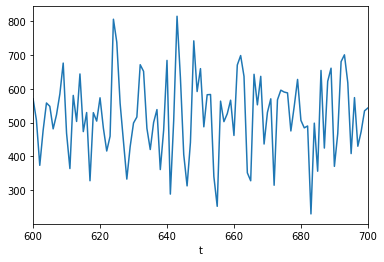

In [119]:
ax = totals[600:701].plot.line()

dfoiadshfioahds